# Exercise 3
### Anton Wiehe & Angelie Kraft

In [332]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Test image
im_frame = Image.open("positives/" + 'p01.png')
np_frame = np.array(im_frame.getdata())
print(len(np_frame))

# Load images (30, 573, 3) == (num_images, num_pixels, rgb)
positives = np.zeros((30, 576, 3))
for i in range(30):
    im_frame = Image.open("positives/" + 'p' + ('0' if (i+1) < 10 else '') + str(i + 1) + '.png')
    positives[i] = np.array(im_frame.getdata())
    
negatives = np.zeros((30, 576, 3))
for i in range(30):
    im_frame = Image.open("negatives/" + 'n' + ('0' if (i+1) < 10 else '') + str(i + 1) + '.png')
    negatives[i] = np.array(im_frame.getdata())
    

576


In [333]:
# get means of RGB values for each image: one tuple of three values per image
def get_RGB_means(images):
    return np.array([np.mean(img, axis=0) for i,img in enumerate(images)])

In [334]:
RGB_means_pos = get_RGB_means(positives)
RGB_means_neg = get_RGB_means(negatives)

In [335]:
def get_RGB_stds(images):
    return np.array([np.std(img, axis=0) for i,img in enumerate(images)])

In [336]:
RGB_stds_pos = get_RGB_stds(positives)
RGB_stds_neg = get_RGB_stds(negatives)

([array([0., 1., 1., 6., 9., 6., 4., 2., 1., 0.]),
  array([0., 0., 0., 0., 2., 4., 8., 8., 4., 4.]),
  array([15.,  6.,  6.,  3.,  0.,  0.,  0.,  0.,  0.,  0.])],
 array([ 6.93501769,  9.42235523, 11.90969276, 14.3970303 , 16.88436783,
        19.37170537, 21.85904291, 24.34638044, 26.83371798, 29.32105552,
        31.80839305]),
 <a list of 3 Lists of Patches objects>)

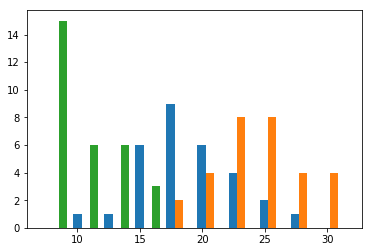

In [337]:
plt.hist(RGB_stds_pos)

([array([11.,  3.,  9.,  2.,  3.,  1.,  1.,  0.,  0.,  0.]),
  array([7., 8., 6., 2., 2., 2., 2., 0., 0., 1.]),
  array([ 9., 10.,  6.,  1.,  2.,  2.,  0.,  0.,  0.,  0.])],
 array([ 4.77345447,  6.78713262,  8.80081077, 10.81448892, 12.82816708,
        14.84184523, 16.85552338, 18.86920153, 20.88287968, 22.89655783,
        24.91023598]),
 <a list of 3 Lists of Patches objects>)

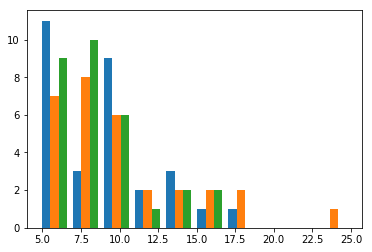

In [338]:
plt.hist(RGB_stds_neg)

([array([0., 1., 1., 6., 9., 6., 4., 2., 1., 0.]),
  array([0., 0., 0., 0., 2., 4., 8., 8., 4., 4.]),
  array([15.,  6.,  6.,  3.,  0.,  0.,  0.,  0.,  0.,  0.])],
 array([ 6.93501769,  9.42235523, 11.90969276, 14.3970303 , 16.88436783,
        19.37170537, 21.85904291, 24.34638044, 26.83371798, 29.32105552,
        31.80839305]),
 <a list of 3 Lists of Patches objects>)

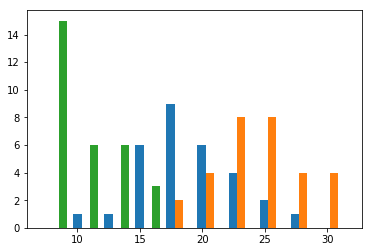

In [339]:
plt.hist(RGB_stds_pos)

([array([11.,  3.,  9.,  2.,  3.,  1.,  1.,  0.,  0.,  0.]),
  array([7., 8., 6., 2., 2., 2., 2., 0., 0., 1.]),
  array([ 9., 10.,  6.,  1.,  2.,  2.,  0.,  0.,  0.,  0.])],
 array([ 4.77345447,  6.78713262,  8.80081077, 10.81448892, 12.82816708,
        14.84184523, 16.85552338, 18.86920153, 20.88287968, 22.89655783,
        24.91023598]),
 <a list of 3 Lists of Patches objects>)

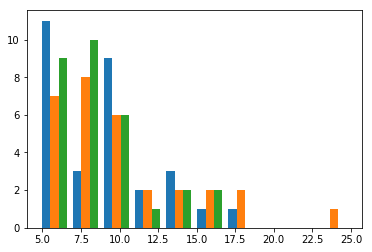

In [340]:
plt.hist(RGB_stds_neg)

In [341]:
def get_top_five(sample):
    red = np.mean(np.sort(sample[:, :, 0], axis=1)[:, :5], axis=1)
    green = np.mean(np.sort(sample[:, :, 1], axis=1)[:, :5], axis=1)
    blue = np.mean(np.sort(sample[:, :, 2], axis=1)[:, :5], axis=1)
    return red, green, blue

In [342]:
top_red_pos, top_green_pos, top_blue_pos = get_top_five(positives)

top_red_neg, top_green_neg, top_blue_neg = get_top_five(negatives)


In [343]:
# We now have sample images (positive and negative) represented by 7-tuples:
# [mean R, mean G, mean B, mean of RGB means, std of R, std of G, std of B]
#samples_pos = np.column_stack((RGB_stds_pos, top_red_pos, top_green_pos, top_blue_pos))
#samples_neg = np.column_stack((RGB_stds_neg, top_red_neg, top_green_neg, top_blue_neg))
samples_pos = np.column_stack((RGB_stds_pos, RGB_means_pos))
samples_neg = np.column_stack((RGB_stds_neg, RGB_means_neg))




In [344]:
def calc_mu(samples):
    return np.sum(samples, axis=0) / len(samples)


In [345]:
def calc_Sigma(mu_1, mu_2, set_1, set_2):
    diff_1 = np.array([x - mu_1 for x in set_1])
    diff_2 = np.array([x - mu_2 for x in set_2])
    diffs = np.concatenate([diff_1, diff_2], axis=0)

    Sigma = np.mean(np.array([diffs[i].reshape(len(diffs[i]),1) @ diffs[i].reshape(1,len(diffs[i])) for i in range(len(diffs))]), axis=0) 
    
    return Sigma


In [346]:
def calc_px_py(x, mu, Sigma):
    n = len(mu)
    _Sigma_=np.sqrt(np.linalg.det(Sigma)) 
    exponent = -0.5*(x-mu).T@np.linalg.inv(Sigma)@(x-mu)
    return (1/((2*np.pi)**(n/2))*_Sigma_)**exponent



In [347]:
def classify(x, phi, mu_1, mu_2, Sigma):
    p_1 = phi * calc_px_py(x, mu_1, Sigma)
    p_2 = (1-phi) * calc_px_py(x, mu_2, Sigma)
    
    if p_1 > p_2:
        return 0
    else:
        return 1
 


In [348]:
def split_data(no_of_tests, set_1, set_2):
    
    all_samples = np.concatenate((set_1, set_2), axis=0)
    
    n =  len(set_1)
    
    test_idxs = np.random.randint(0, n * 2, no_of_tests)
    
    test_features = all_samples[test_idxs,:]
    test_labels = (test_idxs >= 30)
    
    idxs_neg = test_idxs[test_idxs < n]
    idxs_pos = test_idxs[test_idxs >= n] - n

    train_1 = np.delete(set_1, idxs_neg, axis=0)
    train_2 = np.delete(set_2, idxs_pos, axis=0)
    
    return train_1, train_2, test_features, test_labels

In [349]:
def calc_params(set_1, set_2):
    mu_1 = calc_mu(set_1)
    mu_2 = calc_mu(set_2)
    phi = 0.5
    Sigma = calc_Sigma(mu_1, mu_2, set_1, set_2)
    return mu_1, mu_2, phi, Sigma

In [350]:
def train_and_test(no_of_tests):
    train_neg, train_pos, test_features, test_labels = split_data(no_of_tests, samples_neg, samples_pos)
    mu_neg, mu_pos, phi, Sigma = calc_params(train_neg, train_pos)
    correct = 0
    for i in range(no_of_tests):
        correct += test_labels[i] == classify(test_features[i], phi, mu_neg, mu_pos, Sigma)
    print("Accuracy = ", correct/no_of_tests)
    
    

In [351]:
train_and_test(20)

Accuracy =  0.95
